In [3]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from itertools import *
import matplotlib.pyplot as plt
import re
import string
import unidecode
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [4]:
import datetime
import logging
import itertools
import numpy as np

In [5]:
import plotly.tools as tls
tls.set_credentials_file(username="pfan",
                             api_key="nvzyukyl5g")
credentials = tls.get_credentials_file()

import plotly.plotly as py
from plotly.graph_objs import *

In [48]:
# logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
# logging.root.level = logging.INFO  # ipython sometimes messes up the logging setup; restore


In [4]:
data = pd.read_csv('data/sanders_scores.csv')
data[pd.isnull(data['Comment'])] = ""
def unix_convert(x):
    return datetime.datetime.fromtimestamp(x).strftime('%Y')
def to_filter(text):
    terms = ['Bernie', 'Sanders', 'Mr.Sanders']
    if any(word in text for word in terms):
        return text
    else:
        return None 
    
data['Comment_fil'] = data['Comment'].apply(lambda x : to_filter(x))
data['Comment_b'] = pd.notnull(data['Comment_fil'])
data2 = data[data['Comment_b']]
print len(data2)
data2['new_date'] = data2['date'].apply(lambda x : unix_convert(x))
#data2['new_date'] = data2['new_date'].astype(int)
print data2['new_date'].value_counts()

list_ = data2['new_date'].unique()
list_

text_count = []
for i in list_:
    print i
    text_count.append(data2.ix[data2['new_date'] == i]['Comment'])

2434
2015    2014
2010     182
2012     149
2014      41
2011      38
2013      10
dtype: int64
2010
2011
2012
2014
2015
2013


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
def nested_sum(text_list) :
    total = []
    if len(text_list) == 1:
        for l in text_list:
            total.append(l)
    else:
        total2 = []
        for l in text_list:
            #print "list N!"
            for item in l:
                #print 'adding'
                total2.append(item)
        total.append(total2)
    
    return total

In [12]:
#content = nested_sum(text_count[:2])[0]

### NMF

In [75]:
# topics = []

# for i in range(len(text_count)):
#     keyterms = []
#     print i
#     vectorizer = TfidfVectorizer(stop_words='english')
#     content = nested_sum(text_count[:i+1])[0]
#     V = vectorizer.fit_transform(item for item in content).toarray() 
#     features = vectorizer.get_feature_names()
#     nmf = NMF(n_components=5).fit(V)
#     #i+1
#     for topic_idx, topic in enumerate(nmf.components_, 1):
#         keyterms.append(" ".join([features[i]
#                         for i in topic.argsort()[:-10 -1:-1]]))
#     print keyterms
    
# topics.append(keyterms)  

In [16]:
topics = []

for i in range(len(text_count)):
    keyterms = []
    print i
    vectorizer = TfidfVectorizer(stop_words='english')
    #content = nested_sum(text_count[:i])[0]
    V = vectorizer.fit_transform(text_count[i].values).toarray() 
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=5).fit(V)
    #i+1
    for topic_idx, topic in enumerate(nmf.components_, 1):
        keyterms.append(" ".join([features[i]
                        for i in topic.argsort()[:-10 -1:-1]]))
    print keyterms
    
topics.append(keyterms)  

0
[u'candidates trump years christie republican bigger wonder clown benghazi bridgegate', u'new jersey governor foreign policy president christie good expertise office', u'race campaign personality christie won planning based long moderate come', u'mr bush ticket presidential vice better 2016 christie make running', u'truth bridge traffic governor state christie pension teller reports running']
1
[u'trump republican donald gop candidates party mr like media president', u'work hours time working people jobs workers longer americans need', u'jeb bush family brother george president man forget said make', u'walker iran governor war president scott clinton states election state', u'government medicare federal cut health care people social plan tax']
2
[u'trump party donald republican like candidates people gop jeb voters', u'clinton hillary biden president bush obama joe people dowd run', u'kasich ohio john republican governor rubio ticket gov gop candidate', u'jeb brother bush smart famil

/Users/datascientist/anaconda/lib/python2.7/site-packages/sklearn/decomposition/nmf.py:532: UserWarning:

Iteration limit reached during fit. Solving for W exactly.



In [57]:
counts = pd.DataFrame(data2['new_date'].value_counts()).reset_index()
counts.columns = ['new_date', 'count']
counts.sort('new_date', inplace=True)
counts['new_date'].value_counts()
print counts
counts.loc[-1] = np.array(['2015-10', 2014])
print counts

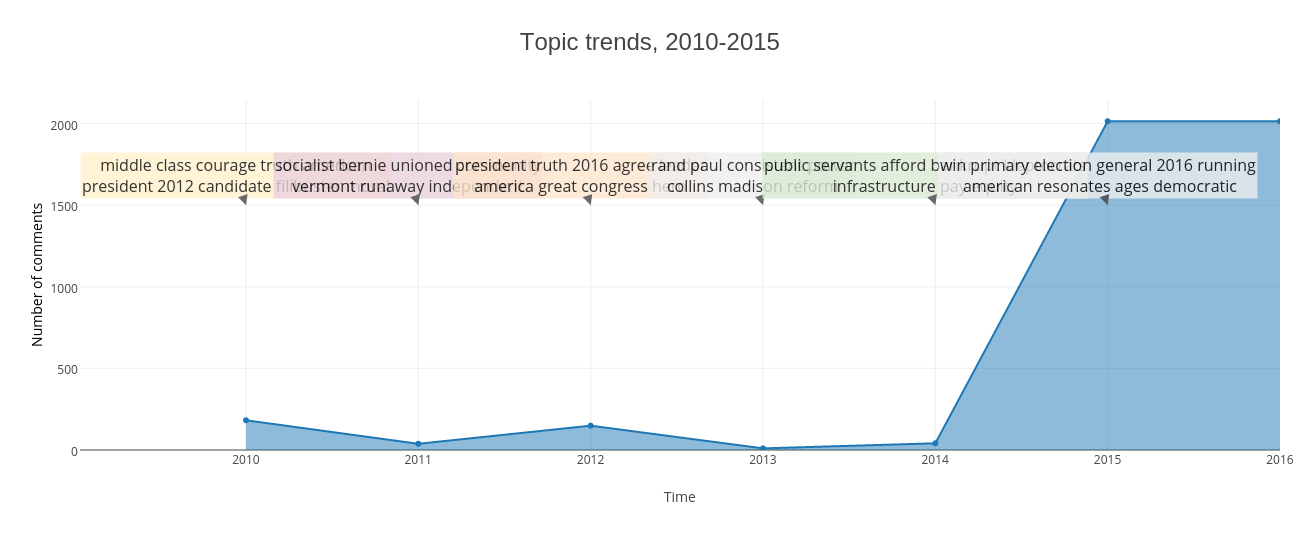

In [17]:
trace1 = Scatter(
        x=counts['new_date'],
        y=counts['count'],
        fill='tozeroy'
)

data = Data([trace1])

layout = Layout(
    title='Topic trends, 2010-2015',
    titlefont=Font(
            family='Arial, sans-serif',
            size=24),
    
    showlegend=False,
    xaxis=XAxis(
        title='Time',
    ),
    
    annotations=Annotations([

        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2010',
            y=1500,
            xref='x',
            yref='y',
            text='middle class courage truth american<br>president 2012 candidate filibuster moral',
            showarrow=True,
            arrowhead=2,
            bgcolor='#FFF2CC',
            opacity=0.8
        ),
            
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2011',
            y=1500,
            xref='x',
            yref='y',
            text='socialist bernie unioned community<br>vermont runaway independent',
            showarrow=True,
            arrowhead=2,
            bgcolor='#EAD1DC',
            opacity=0.8
        ),
        
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2012',
            y=1500,
            xref='x',
            yref='y',
            text='president truth 2016 agree leader<br>america great congress hero',
            showarrow=True,
            arrowhead=2,
            bgcolor='#FCE5CD',
            opacity=0.8
        ),
            
    Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2013',
            y=1500,
            xref='x',
            yref='y',
            text='rand paul consistent power<br>collins madison reform',
            showarrow=True,
            arrowhead=2,
            bgcolor='#EEEEEE',
            opacity=0.8
        ),
          
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2014',
            y=1500,
            xref='x',
            yref='y',
            text='public servants afford bankrupt kleptocrats<br>infrastructure pay equity',
            showarrow=True,
            arrowhead=2,
            bgcolor='#D9EAD3',
            opacity=0.8
        ),
            
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015',
            y=1500,
            xref='x',
            yref='y',
            text='win primary election general 2016 running<br> american resonates ages democratic',
            showarrow=True,
            arrowhead=2,
            bgcolor='#EEEEEE',
            opacity=0.8
        ),
        
        
        
        ]),
    
    width=1300,
    height=550,
    
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        r=20,      #   right,  
        l=80#   left
    ),
    yaxis=YAxis(
        title='Number of comments',
        titlefont=Font(
            family='Open Sans',
            size=14,
            color='#000000'
    )
    ))
    
fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='sanders_time')

In [22]:
data = pd.read_csv('data/bush_scores.csv')
data[pd.isnull(data['Comment'])] = ""
def unix_convert(x):
    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m')
def to_filter(text):
    terms = ['Bush', 'Jeb', "Governor"]
    if any(word in text for word in terms):
        return text
    else:
        return None 
    
data['Comment_fil'] = data['Comment'].apply(lambda x : to_filter(x))
data['Comment_b'] = pd.notnull(data['Comment_fil'])
data2 = data[data['Comment_b']]
print len(data2)
data2['new_date'] = data2['date'].apply(lambda x : unix_convert(x))
#data2['new_date'] = data2['new_date'].astype(int)
print data2['new_date'].value_counts()

list_ = data2['new_date'].unique()
print list_

text_count = []
for i in list_:
    print i
    text_count.append(data2.ix[data2['new_date'] == i]['Comment'])

3885
2015-07    1571
2015-08    1368
2015-09     903
2015-06      43
dtype: int64
['2015-06' '2015-07' '2015-08' '2015-09']
2015-06
2015-07
2015-08
2015-09


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [21]:
topics = []

for i in range(len(text_count)):
    keyterms = []
    print i
    vectorizer = TfidfVectorizer(stop_words='english')
    #content = nested_sum(text_count[:i])[0]
    V = vectorizer.fit_transform(text_count[i].values).toarray() 
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=5).fit(V)
    #i+1
    for topic_idx, topic in enumerate(nmf.components_, 1):
        keyterms.append(" ".join([features[i]
                        for i in topic.argsort()[:-10 -1:-1]]))
    print keyterms
    
topics.append(keyterms) 

0
[u'candidates trump years christie republican bigger wonder clown benghazi bridgegate', u'new jersey governor foreign policy president christie good expertise office', u'race campaign personality christie won planning based long moderate come', u'mr bush ticket presidential vice better 2016 christie make running', u'truth bridge traffic governor state christie pension teller reports running']
1
[u'trump republican donald gop candidates party mr like media president', u'work hours time working people jobs workers longer americans need', u'jeb bush family brother george president man forget said make', u'walker iran governor war president scott clinton states election state', u'government medicare federal cut health care people social plan tax']
2


/Users/datascientist/anaconda/lib/python2.7/site-packages/sklearn/decomposition/nmf.py:532: UserWarning:

Iteration limit reached during fit. Solving for W exactly.



KeyboardInterrupt: 

In [23]:
counts = pd.DataFrame(data2['new_date'].value_counts()).reset_index()
counts.columns = ['new_date', 'count']
counts.sort('new_date', inplace=True)
#counts['new_date'].value_counts()
#counts['new_date'] = counts['new_date'].astype(int)
#counts = counts[counts['new_date'] > 2012]
counts

,new_date,count
3,2015-06,43
0,2015-07,1571
1,2015-08,1368
2,2015-09,903


In [24]:
counts['new_date'] = counts['new_date'].astype(str)
counts.loc[-1] = np.array(['2015-10', 903])
counts

,new_date,count
3,2015-06,43
0,2015-07,1571
1,2015-08,1368
2,2015-09,903
-1,2015-10,903


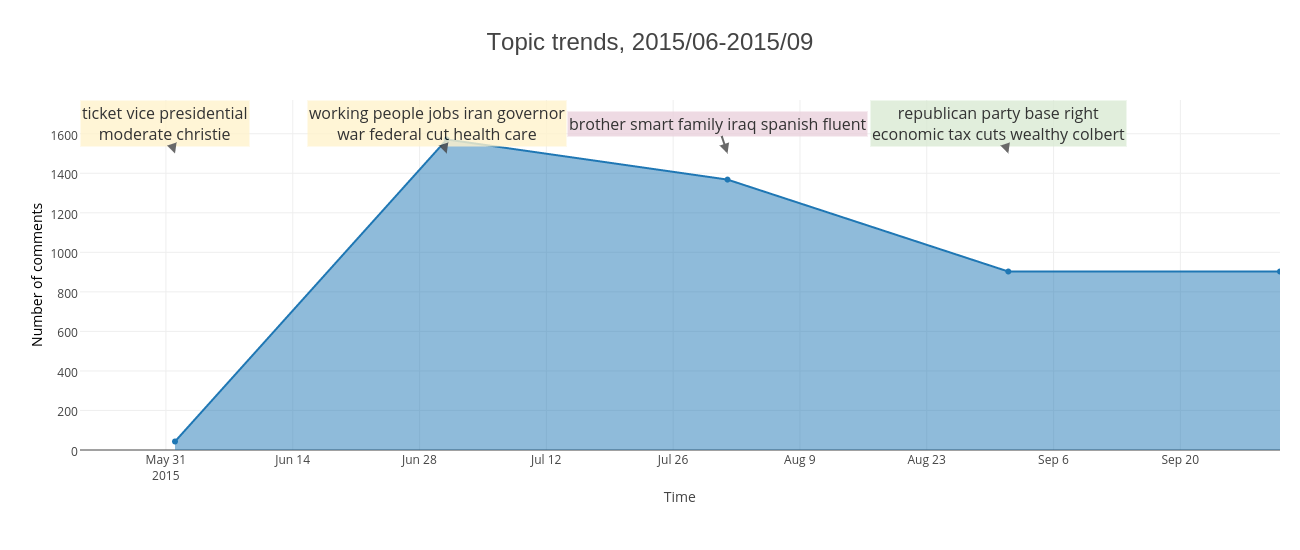

In [25]:
trace1 = Scatter(
        x=counts['new_date'],
        y=counts['count'],
        fill='tozeroy'
)

data = Data([trace1])

layout = Layout(
    title='Topic trends, 2015/06-2015/09',
    titlefont=Font(
            family='Arial, sans-serif',
            size=24),
    
    showlegend=False,
    xaxis=XAxis(
        title='Time',
    ),
    
    annotations=Annotations([

        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015-06',
            y=1500,
            xref='x',
            yref='y',
            text='ticket vice presidential<br>moderate christie',
            showarrow=True,
            arrowhead=2,
            bgcolor='#FFF2CC',
            opacity=0.8
        ),
            
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015-07',
            y=1500,
            xref='x',
            yref='y',
            text='working people jobs iran governor<br>war federal cut health care',
            showarrow=True,
            arrowhead=2,
            bgcolor='#FFF2CC',
            opacity=0.8
        ),
            
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015-08',
            y=1500,
            xref='x',
            yref='y',
            text='brother smart family iraq spanish fluent',
            showarrow=True,
            arrowhead=2,
            bgcolor='#EAD1DC',
            opacity=0.8
        ),
        
      Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015-09',
            y=1500,
            xref='x',
            yref='y',
            text='republican party base right<br>economic tax cuts wealthy colbert',
            showarrow=True,
            arrowhead=2,
            bgcolor='#D9EAD3',
            opacity=0.8
        ),
            

        ]),
    
    width=1300,
    height=550,
    
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        r=20,      #   right,  
        l=80#   left
    ),
    yaxis=YAxis(
        title='Number of comments',
        titlefont=Font(
            family='Open Sans',
            size=14,
            color='#000000'
    )
    ))
    
fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='bush_time')

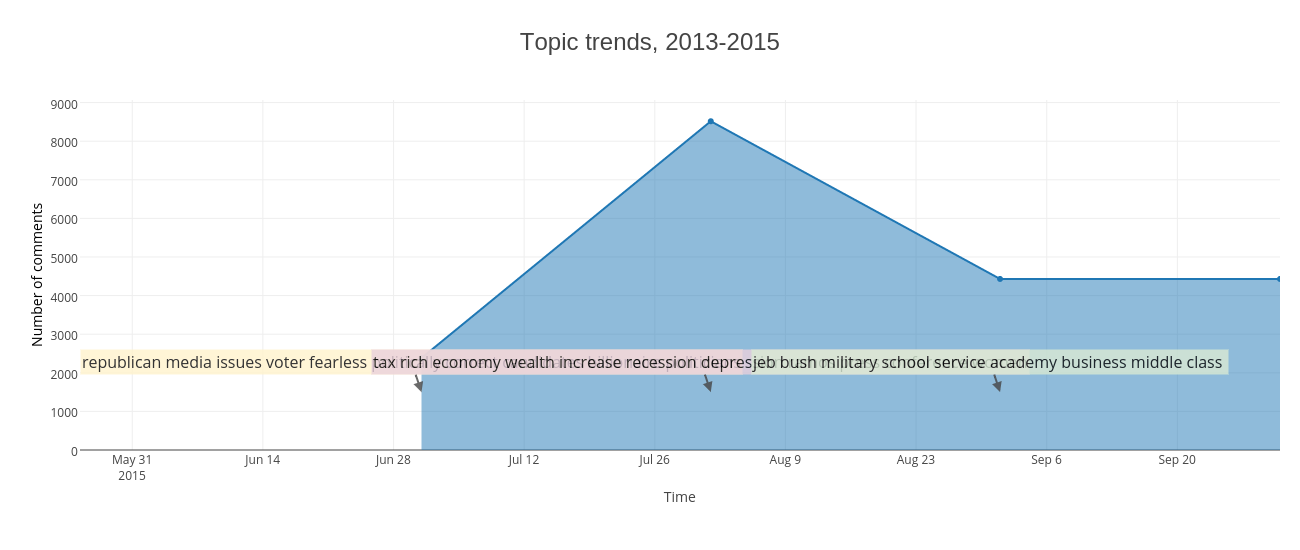

In [19]:
trace1 = Scatter(
        x=counts['new_date'],
        y=counts['count'],
        fill='tozeroy'
)

data = Data([trace1])

layout = Layout(
    title='Topic trends, 2013-2015',
    titlefont=Font(
            family='Arial, sans-serif',
            size=24),
    
    showlegend=False,
    xaxis=XAxis(
        title='Time',
    ),
    
    annotations=Annotations([

        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015-07',
            y=1500,
            xref='x',
            yref='y',
            text='republican media issues voter fearless politically correct candidates billionaire politicians',
            showarrow=True,
            arrowhead=2,
            bgcolor='#FFF2CC',
            opacity=0.8
        ),
            
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015-08',
            y=1500,
            xref='x',
            yref='y',
            text='tax rich economy wealth increase recession depression ramos press conference women',
            showarrow=True,
            arrowhead=2,
            bgcolor='#EAD1DC',
            opacity=0.8
        ),
        
      Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015-09',
            y=1500,
            xref='x',
            yref='y',
            text='jeb bush military school service academy business middle class ',
            showarrow=True,
            arrowhead=2,
            bgcolor='#D9EAD3',
            opacity=0.8
        ),
            

        ]),
    
    width=1300,
    height=550,
    
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        r=20,      #   right,  
        l=80#   left
    ),
    yaxis=YAxis(
        title='Number of comments',
        titlefont=Font(
            family='Open Sans',
            size=14,
            color='#000000'
    )
    ))
    
fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='trump_time')